# SUPERNOVA
## Firecrown-PLOT $w$CDM comparison Notebook - II
### Ayan Mitra
### OCT, 2023
####  wCDM comparison from [2210.07560] dataset for Spectroscopic dataset.Firecrown SN Likelihood + Cosmosis vs. WFIT. In WFIT only prior is used, which is approximated with a R shift parameter (Eq.69, Komatsu et.al 2009), tuned to match the same constraining power as Planck (2020) [1807.06209].

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cosmosis.postprocess import parser
from cosmosis.postprocessing.inputs import read_input
from cosmosis.postprocessing.postprocess import postprocessor_for_sampler
from cosmosis.postprocessing.plots import MetropolisHastingsPlots2D, MetropolisHastingsPlots1D
import os
import csv
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [1]:
import chainconsumer
from chainconsumer import ChainConsumer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def convert(lst):
    return (lst[0].split())

# Chainconsumer Diagnostics
## Cant find burn in options in chainconsumer
## Later sections have results with Cosmosis-postprocess

In [2]:
a = pd.read_csv('/pscratch/sd/a/ayanmitr/Results/Firecrown_validation/srd_sn/output/SPEC_BINNED_CMB_BAO_WCDM/output/Results/sn_srd_planck_bao.txt',
               sep="\s+",comment='#',header=None)

In [3]:
Label = ['$\Omega_{bh}^2$',
         '$\Omega_m$',
         '$h_0$',
         '$w_0$',
    'tau', 
    '$n_s$',
    'log1e10as',
    'M']

In [75]:
#a.iloc[:,7]

In [76]:
#plt.plot(a.iloc[:,3])

In [77]:
a = a[a.iloc[:, 3] >= -1.14]
#plt.plot(a.iloc[:,3])
a = a[a.iloc[:, 7] >= -19.50]
#plt.plot(a.iloc[:,7])

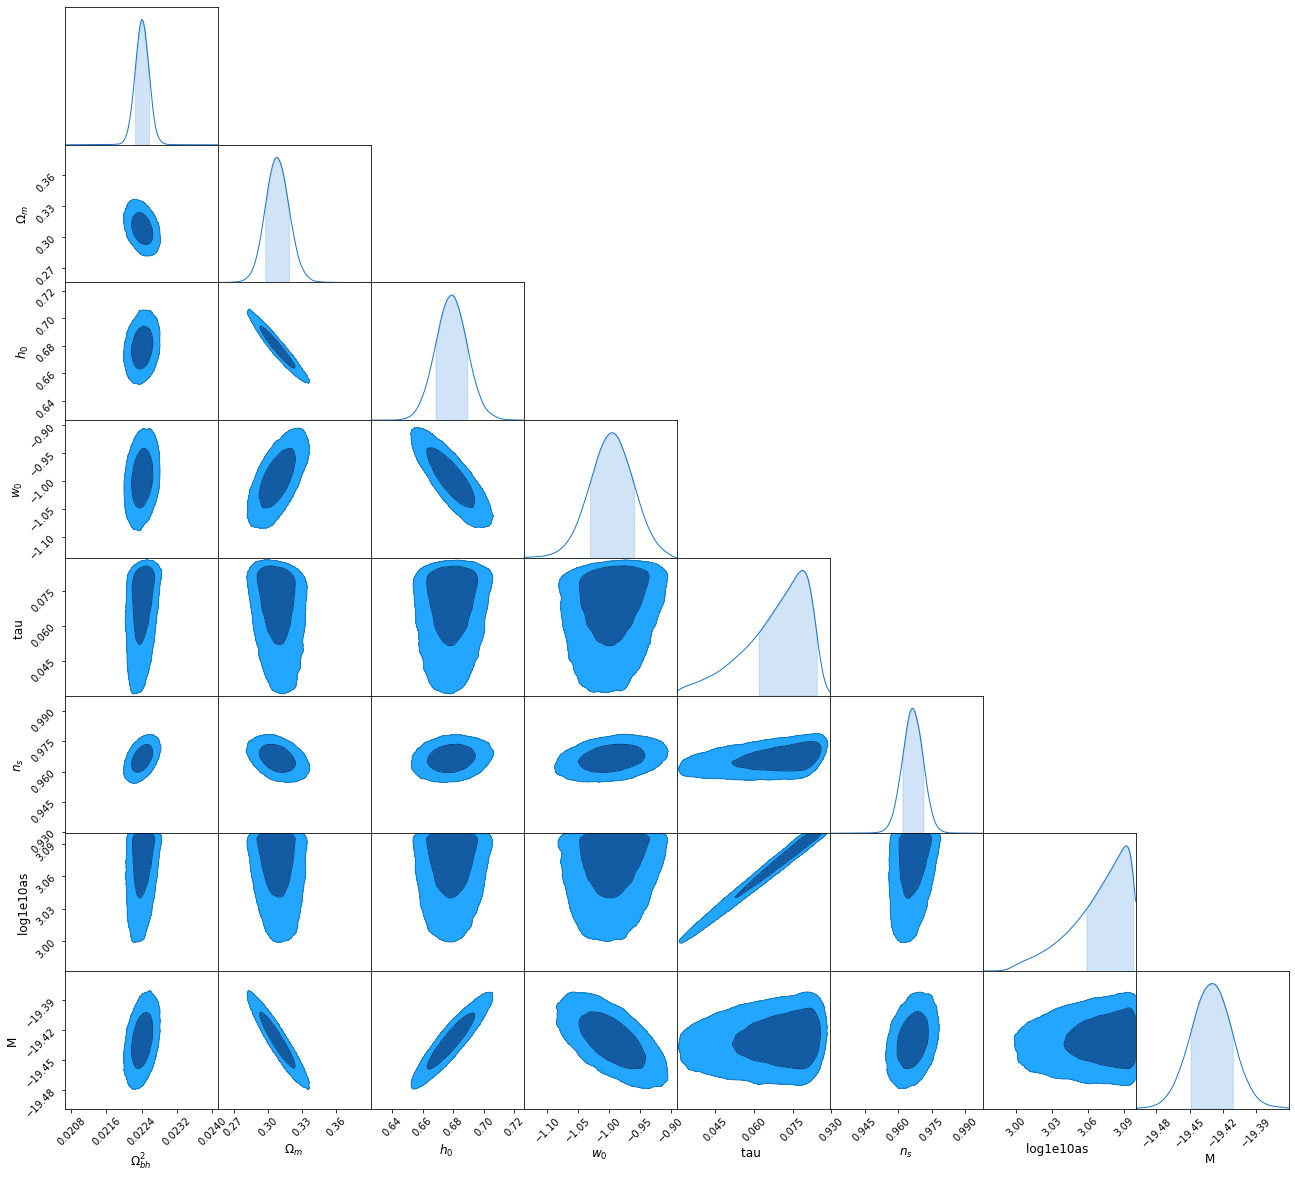

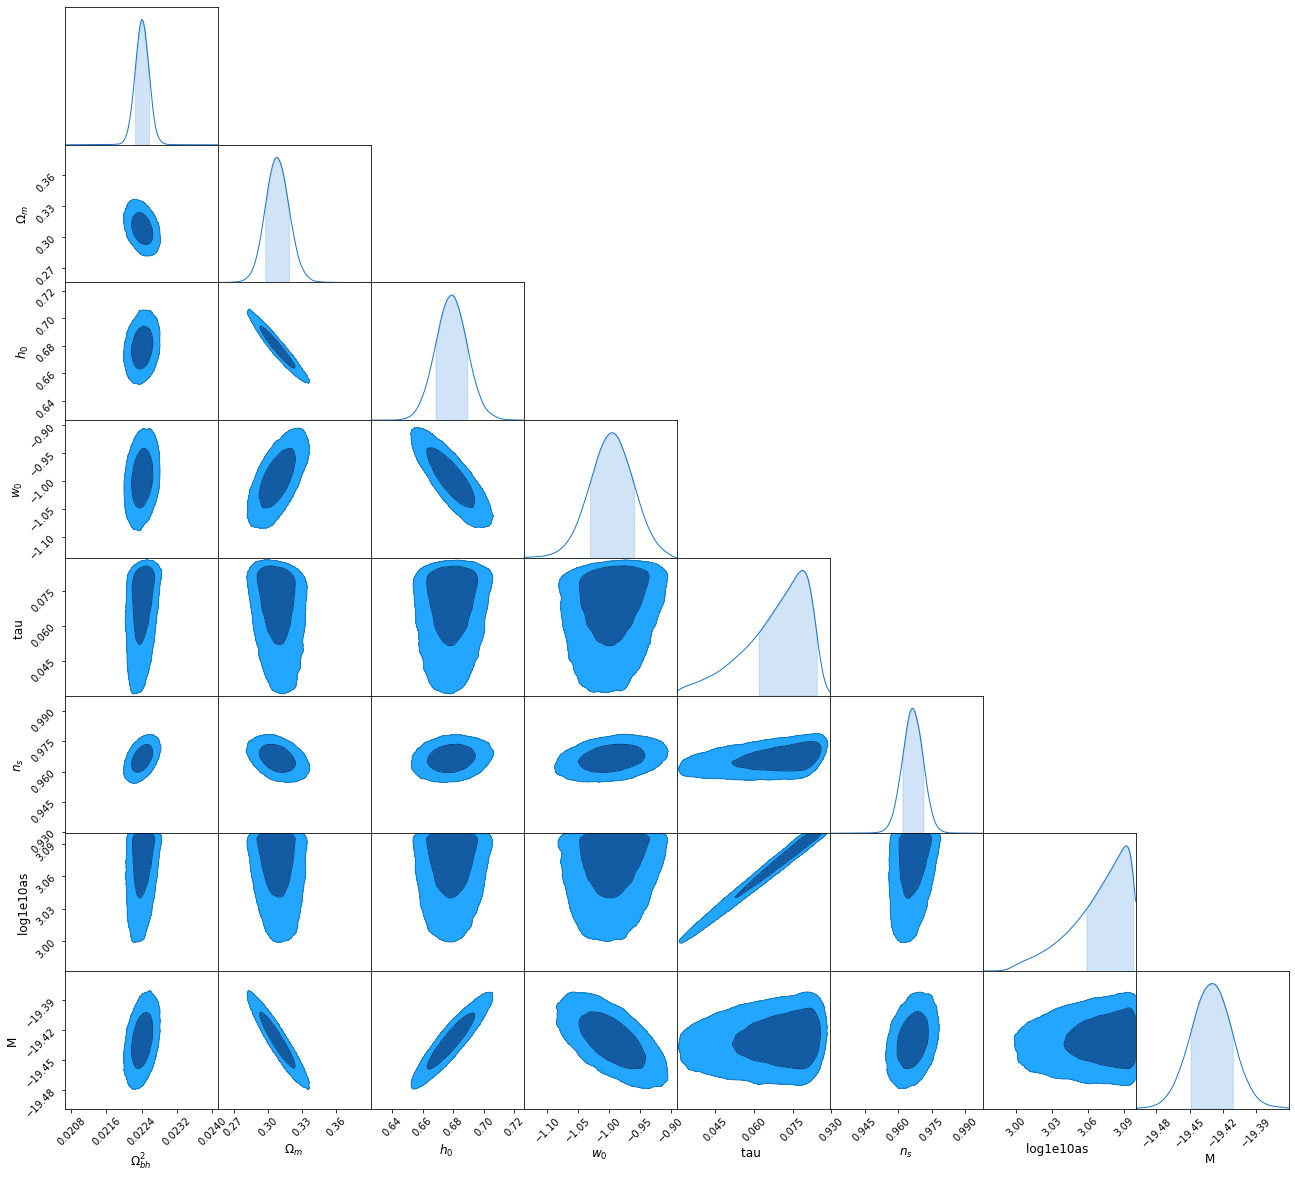

In [8]:
c = ChainConsumer()
c.add_chain(a.values[:, :-2], parameters=Label, kde=1, name="wCDM_LSST_SIM_Chainconsumer")

c.plotter.plot(filename="chain_consumer.png", display=True, figsize=(20, 18))  # Adjust the width and height as needed

In [9]:
print(c.analysis.get_latex_table())

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{ccccccccc}
        \hline
		Model & $\Omega_{bh}^2$ & $\Omega_m$ & $h_0$ & $w_0$ & tau & $n_s$ & log1e10as & M \\ 
		\hline
		wCDM_LSST_SIM_Chainconsumer & $\left( 224.1\pm 1.6 \right) \times 10^{-4}$ & $0.308\pm 0.010$ & $0.679^{+0.010}_{-0.011}$ & $-0.995^{+0.035}_{-0.036}$ & $\left( 78.6^{+5.6}_{-16.7} \right) \times 10^{-3}$ & $\left( 966.4^{+4.8}_{-4.5} \right) \times 10^{-3}$ & $\left( 3092.4^{+5.5}_{-33.4} \right) \times 10^{-3}$ & $-19.430\pm 0.019$ \\ 
		\hline
    \end{tabular}
\end{table}


# Cosmosis Postprocess

In [3]:
Burnin = 100000
path = '/pscratch/sd/a/ayanmitr/Results/Firecrown_validation/srd_sn/output/SPEC_BINNED_CMB_BAO_WCDM/output/Results/'
sampler, ini = read_input(path+"sn_srd_planck_bao.ini")
os.makedirs(path, exist_ok=True)
proc = postprocessor_for_sampler(sampler)(ini, "sn_srd_planck_bao.txt", 0, burn=Burnin, no_2d=False)
#---------------------------------------------------
# Printintg out the parameter list
with open(path+'sn_srd_planck_bao.txt') as f:
    reader = csv.reader(f)
    row1 = next(reader)  # gets the first line
row1 = [word.replace('\t','  ') for word in row1]
row1 = [word.replace('#','  ') for word in row1]  
#print('\n\n',row1)
row1 = convert(row1)
print('Parameter List:')

LOADING CHAIN FROM FILE:  /pscratch/sd/a/ayanmitr/Results/Firecrown_validation/srd_sn/output/SPEC_BINNED_CMB_BAO_WCDM/output/Results/sn_srd_planck_bao.txt
Parameter List:


In [14]:
row1

['cosmological_parameters--ombh2',
 'cosmological_parameters--omega_m',
 'cosmological_parameters--h0',
 'cosmological_parameters--w',
 'cosmological_parameters--tau',
 'cosmological_parameters--n_s',
 'cosmological_parameters--log1e10as',
 'firecrown_supernova_parameters--sn_ddf_sample_m',
 'prior',
 'post']

In [14]:
np.shape(proc.data)

(1, 280045, 10)

In [64]:
'''
## If we want to clean up some data columns
# Assuming data is your 3D array
w_index = 3  # Adjust this to the actual index of the 'cosmological_parameters--w' column

# Filter rows from the first block
filtered_block = proc.data[0][proc.data[0][:, w_index] >= -1.10]

# If you want to maintain the 3D structure:
filtered_data = filtered_block[np.newaxis, :]
proc.data = filtered_data
''';

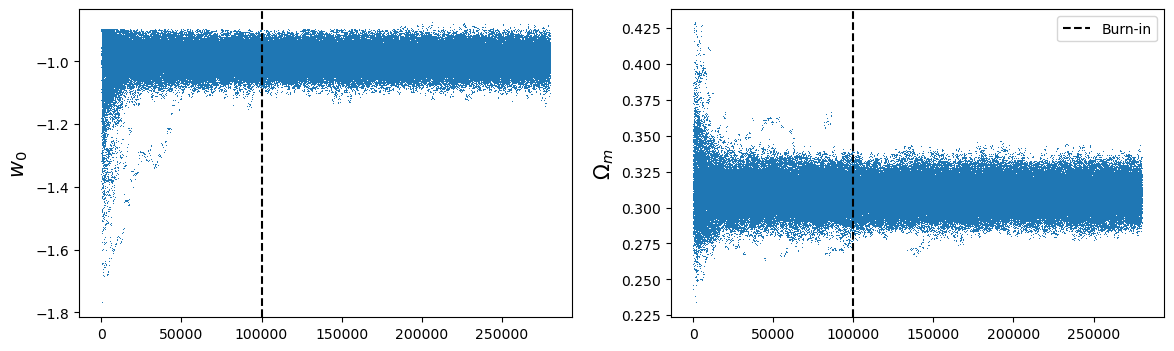

In [4]:
plt.rcParams['figure.figsize'] = [14,4] 
plt.subplot(1,2,1)
plt.plot(proc.data[0][:,3], ',')
plt.axvline(Burnin,linestyle='--',c='black') # check that the burn-in above is enough
plt.ylabel('$w_0$',fontsize=15)
plt.subplot(1,2,2)
plt.plot(proc.data[0][:,1], ',')
plt.axvline(Burnin,linestyle='--',c='black',label='Burn-in') # check that the burn-in above is enough
plt.ylabel('$\Omega_m$',fontsize=15)
plt.legend()
plt.show()

In [ ]:

# Set the figure size
plt.rcParams['figure.figsize'] = [20, 7] 

Label = ['$\Omega_{bh}^2$',
         '$\Omega_m$',
         '$h_0$',
         '$w$',
    'tau', 
    '$n_s$',
    'log1e10as',
    'M',
     'prior', 'post'   ]
# Assuming Burnin is defined somewhere in your code
# Loop through each column for plotting
for i, column_name in enumerate(row1):
    plt.subplot(2, 5, i+1)
    plt.plot(proc.data[0][:, i], ',')
    plt.axvline(Burnin, linestyle='--', c='black')
    plt.ylabel(Label[i], fontsize=18)
    if i == 0:  # Add legend only to the first plot to avoid repetition
        plt.legend(['Data', 'Burn-in'])

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

In [8]:
wfit = [0.314, 0.008, -1.003, 0.003] # Om, sig_Om,w,sig_w. Copied from WFIT output files in RCC.


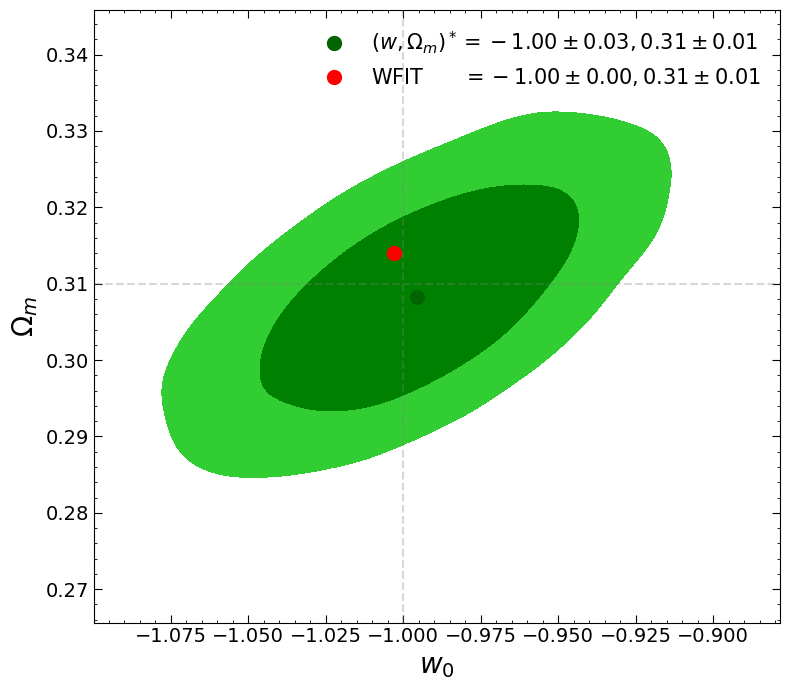

In [67]:
#%%timeit
plt.rcParams['figure.figsize'] = [8,7] 
txt='SN + CMB'
fig, ax = plt.subplots()
plotter = MetropolisHastingsPlots2D(proc)
x = plotter.reduced_col("cosmological_parameters--w") # w0
y = plotter.reduced_col("cosmological_parameters--omega_m")# wa
xax, yax, like = plotter.smooth_likelihood(x, y, "cosmological_parameters--omega_m",  "cosmological_parameters--w")
level1, level2,l3  = plotter._find_contours(like, x, y, xax, yax, 1 - 0.68, 1 - 0.95)
w0m  =  np.mean(x);w0std=  np.std(x);
om  =  np.mean(y);omstd=  np.std(y);
ax.contourf(xax, yax, like.T, [level2,level1],colors=['white', 'limegreen','green'], extend='both')
ax.plot(np.mean(x),np.mean(y),'o',c='darkgreen',markersize=10,label=r'$(w ,\Omega_m)^*= %.2f\pm %.2f,%.2f \pm %.2f$'%(w0m,w0std,om,omstd))
ax.plot(wfit[2],wfit[0],'o',c='r',markersize=10,label=r'WFIT      $= %.2f\pm %.2f,%.2f \pm %.2f$'%(wfit[2],wfit[3],wfit[0],wfit[1]))
ax.set_xlabel(r'$w_0$',fontsize=20)
ax.set_ylabel(r'$\Omega_m$',fontsize=20)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.minorticks_on()
ax.tick_params(which = 'both',direction="in")
ax.tick_params(length=6)
plt.legend(loc = 'upper right',prop={'size': 15},frameon=False)
#plt.text(-1.25,-0.75,"$^*$%s"%txt,fontsize=20,color='black')
#plt.text(-0.92,0.2,'Sampler : Emcee \nSN : SNANA simulations \nSpectroscopic sample\nCMB : Planck 2018',fontsize=10)
plt.yticks(fontsize=14);plt.xticks(fontsize=14)
plt.axhline(0.310, linestyle = '--',color='grey',alpha = 0.3)
plt.axvline(-1, linestyle = '--',color='grey',alpha=0.3)
plt.tight_layout()
#plt.savefig(path+'output/2D.pdf',bbox_inches='tight')

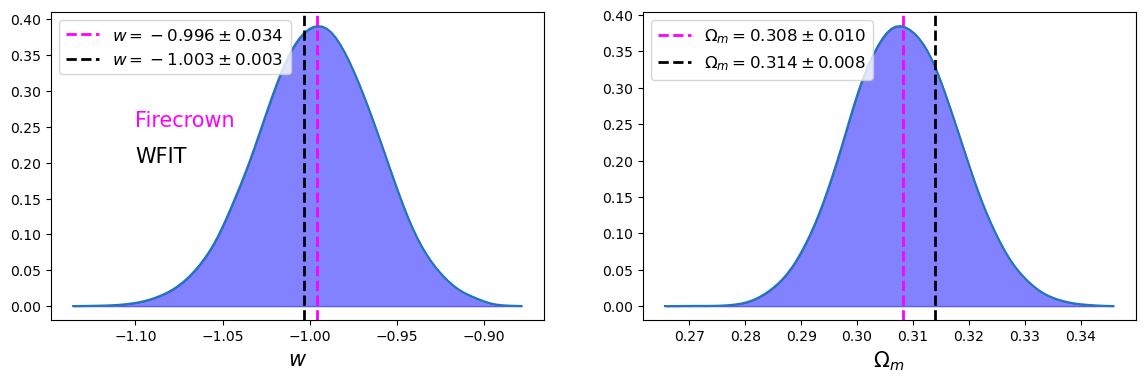

In [9]:
plt.rcParams['figure.figsize'] = [14,4] 

plotter = MetropolisHastingsPlots1D(proc)
y1, L1 = plotter.smooth_likelihood(x, "cosmological_parameters--w")
y2, L2 = plotter.smooth_likelihood(y, "cosmological_parameters--omega_m")

plt.subplot(1,2,1)
plt.plot(y1, L1)
plt.fill_between(y1,L1,color='b',alpha=0.49)
plt.xlabel("$w$",fontsize=15)
#plt.ylabel("Likelihood",fontsize=15)
plt.axvline(w0m,linestyle = '--',linewidth=2,c='magenta',label=r'$w = %.3f \pm %.3f$'%(w0m,w0std))
plt.axvline(wfit[2],linestyle = '--',linewidth=2,c='black',label=r'$w = %.3f \pm %.3f$'%(wfit[2],wfit[3]))
plt.legend(loc='best',fontsize=12)
plt.text(-1.10,0.25,'Firecrown',c='magenta',fontsize=15)
plt.text(-1.10,0.2,'WFIT',c='black',fontsize=15)
plt.subplot(1,2,2)
plt.plot(y2, L2)
plt.fill_between(y2,L2,color='b',alpha=0.49)
plt.xlabel("$\Omega_m$",fontsize=15)
#plt.ylabel("Likelihood",fontsize=15)
plt.axvline(om,linestyle = '--',linewidth=2,c='magenta',label=r'$\Omega_m = %.3f \pm %.3f$'%(om,omstd))
plt.axvline(wfit[0],linestyle = '--',linewidth=2,c='black',label=r'$\Omega_m = %.3f \pm %.3f$'%(wfit[0],wfit[1]))
plt.legend(loc='best',fontsize=12)

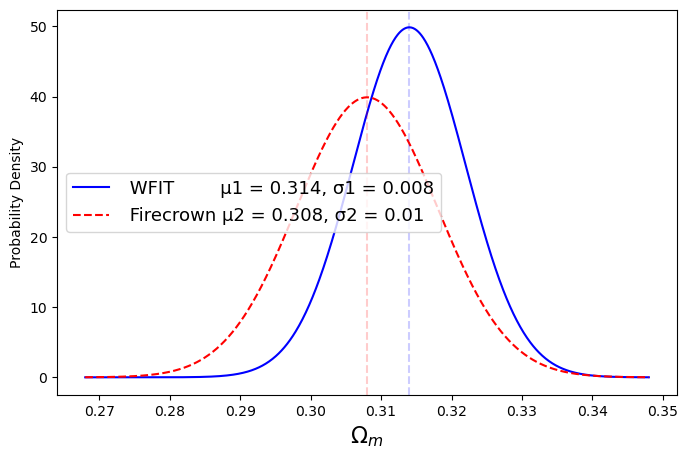

In [11]:
# Given mean and standard deviation for the first Gaussian
# WFIT
mu = 0.314
sigma = 0.008

# Given mean and standard deviation for the second Gaussian
# Firecrown
mu2 = 0.308
sigma2 = 0.010

# Generate x values
x = np.linspace(min(mu - 4*sigma, mu2 - 4*sigma2), 
                max(mu + 4*sigma, mu2 + 4*sigma2), 1000)

# Calculate the PDF of the first normal distribution for each x value
pdf = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(- 0.5 * ((x - mu)/sigma)**2)

# Calculate the PDF of the second normal distribution for each x value
pdf2 = (1/(sigma2 * np.sqrt(2 * np.pi))) * np.exp(- 0.5 * ((x - mu2)/sigma2)**2)

# Plot the two normal distribution curves
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label=f" WFIT        μ1 = {mu}, σ1 = {sigma}", color='blue')
plt.plot(x, pdf2, label=f" Firecrown μ2 = {mu2}, σ2 = {sigma2}", color='red', linestyle='--')
#plt.title('Normal Distribution Curves')
plt.xlabel('$\Omega_m$',fontsize=16)
plt.ylabel('Probability Density')
plt.axvline(mu,c='b',linestyle='--',alpha=0.2)
plt.axvline(mu2,c='r',linestyle='--',alpha=0.2)
plt.legend(fontsize=13)
#plt.grid(True)
plt.show()

In [73]:
for p in proc.elements:
    print(p)

<class 'cosmosis.postprocessing.plots.MetropolisHastingsPlots'>
<class 'cosmosis.postprocessing.plots.TracePlots'>
<class 'cosmosis.postprocessing.statistics.MetropolisHastingsStatistics'>
<class 'cosmosis.postprocessing.statistics.MetropolisHastingsCovariance'>
<class 'cosmosis.postprocessing.statistics.Citations'>


In [12]:
proc.run()

 - 1D plot  cosmological_parameters--ombh2
 - 1D plot  cosmological_parameters--omega_m
 - 1D plot  cosmological_parameters--h0
 - 1D plot  cosmological_parameters--w
 - 1D plot  cosmological_parameters--tau
 - 1D plot  cosmological_parameters--n_s
 - 1D plot  cosmological_parameters--log1e10as
 - 1D plot  firecrown_supernova_parameters--sn_ddf_sample_m
(Making 2D plots using KDE; this takes a while but is really cool)
  (making cosmological_parameters--ombh2 vs cosmological_parameters--h0)
  (making cosmological_parameters--ombh2 vs cosmological_parameters--n_s)
  (making cosmological_parameters--ombh2 vs cosmological_parameters--log1e10as)
  (making cosmological_parameters--omega_m vs cosmological_parameters--ombh2)
  (making cosmological_parameters--omega_m vs cosmological_parameters--h0)
  (making cosmological_parameters--omega_m vs cosmological_parameters--n_s)
  (making cosmological_parameters--omega_m vs cosmological_parameters--log1e10as)
  (making cosmological_parameters--w vs

['./cosmological_parameters--ombh2.png',
 './cosmological_parameters--omega_m.png',
 './cosmological_parameters--h0.png',
 './cosmological_parameters--w.png',
 './cosmological_parameters--tau.png',
 './cosmological_parameters--n_s.png',
 './cosmological_parameters--log1e10as.png',
 './firecrown_supernova_parameters--sn_ddf_sample_m.png',
 './2D_cosmological_parameters--ombh2_cosmological_parameters--h0.png',
 './2D_cosmological_parameters--ombh2_cosmological_parameters--n_s.png',
 './2D_cosmological_parameters--ombh2_cosmological_parameters--log1e10as.png',
 './2D_cosmological_parameters--omega_m_cosmological_parameters--ombh2.png',
 './2D_cosmological_parameters--omega_m_cosmological_parameters--h0.png',
 './2D_cosmological_parameters--omega_m_cosmological_parameters--n_s.png',
 './2D_cosmological_parameters--omega_m_cosmological_parameters--log1e10as.png',
 './2D_cosmological_parameters--w_cosmological_parameters--ombh2.png',
 './2D_cosmological_parameters--w_cosmological_parameters-